<a href="https://colab.research.google.com/github/bishair/Model/blob/main/GWModel3Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow pandas scikit-learn matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import os
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Prompt the user to select a file from their local computer
uploaded = files.upload()

Saving G1F.csv to G1F.csv


In [ ]:
# Get a list of all files in the current working directory (where uploaded files are located)
uploaded_files = os.listdir()

# Print the list of uploaded files
print("Uploaded files:")
for file in uploaded_files:
    print(file)

Uploaded files:
.config
G1F.csv
sample_data


In [ ]:
#os.remove("")

In [ ]:
data = pd.read_csv('G1F.csv', delimiter=';')

In [ ]:
data.head()

,date,G1,RiverLevel,Recharge,Precipitation
0,02/06/2014,"110,738","110,659","5,00E-09",0
1,03/06/2014,"110,658","110,49","5,00E-09",0
2,04/06/2014,"110,563","110,391","5,00E-09",0
3,05/06/2014,"110,498","110,292","5,00E-09",0
4,06/06/2014,"110,428","110,234","5,00E-09",0


In [ ]:
# Convert columns to numeric, replacing commas with dots
for col in ['G1', 'RiverLevel', 'Recharge', 'Precipitation']:
    data[col] = pd.to_numeric(data[col].str.replace(',', '.'), errors='coerce')

# Handle missing values (if any)
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']] = scaler.fit_transform(data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']])

# Split the data into features and target
X = data[['RiverLevel', 'Recharge', 'Precipitation']]
y = data['G1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/100
3/3 [==============================] - 1s 64ms/step - loss: 0.1480 - val_loss: 0.1942
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 0.1014 - val_loss: 0.1409
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0709 - val_loss: 0.1010
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0522 - val_loss: 0.0716
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0356 - val_loss: 0.0522
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0265 - val_loss: 0.0384
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0194 - val_loss: 0.0292
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0154 - val_loss: 0.0229
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0129 - val_loss: 0.0190
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0118 - val_loss: 0.0168
Epoch 11/100
3/3 [=

1/1 [==============================] - 0s 40ms/step


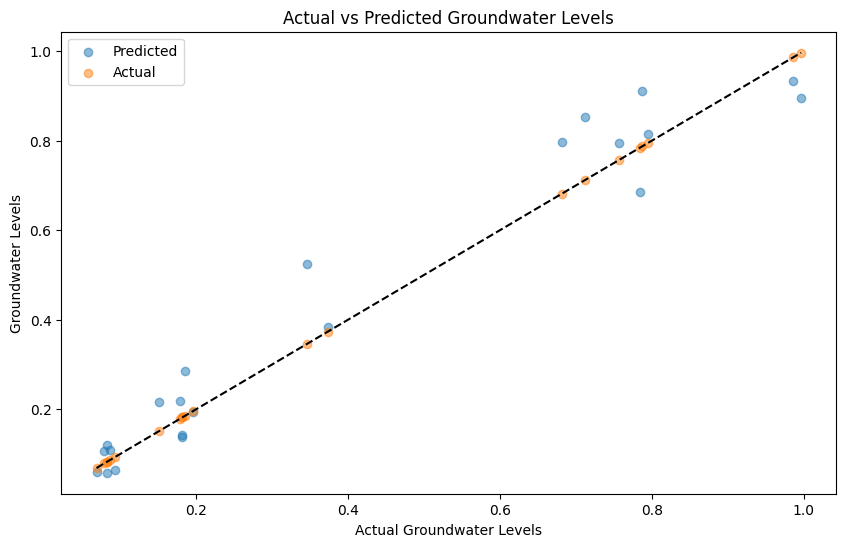

In [ ]:

# Predict the groundwater levels on the test set
y_pred = model.predict(X_test).flatten()

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual')
plt.xlabel('Actual Groundwater Levels')
plt.ylabel('Groundwater Levels')
plt.title('Actual vs Predicted Groundwater Levels')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Diagonal line
plt.legend()
plt.show()

